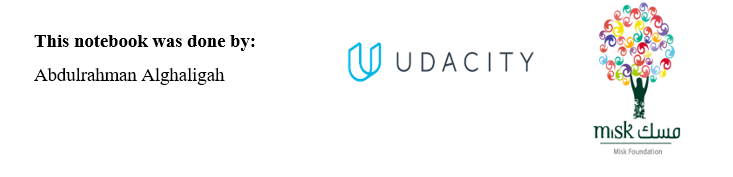

## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv') # reding csv file
df.head() #displaying a few rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape #finding the number of rows and columns in the dataset

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique() # finding how many unique user by using user_id coulmn 

290584

d. The proportion of users converted.

In [5]:
df.converted.mean() # finding the mean of the converted users

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['landing_page']=='new_page') != (df['group']=='treatment')) == True].shape[0] # finding how many times new_page and treatment didn't line up

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() # finding how many null value

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.query("(group == 'control' and landing_page =='old_page') or (group == 'treatment' and  landing_page=='new_page')") # creating a new dataframe with aligned rows

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique() # finding how many unique user by using user_id coulmn 

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')]['user_id'] # finding the one user_id repated

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated('user_id')] # displaying the row information 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2=df2.drop_duplicates(['user_id'],keep='first') # remove one of the rows with duplicate user_id
df2[df2.duplicated('user_id')]['user_id'].count() # checking how many duplicated row in the dataset 

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean() # the probability of an individual converting regardless of the page they receive

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2['group']=='control']['converted'].mean() # Given that an individual was in the control group, finding the probability they converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2['group']=='treatment']['converted'].mean() # Given that an individual was in the treatment group, finding the probability they converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
len(df2.query('landing_page == "new_page"'))/df2.shape[0] # finding the probability that an individual received the new page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

## The answer:
from the above results, we can see that the users in the treatment group have less probability than the control group for conversion, however,if we check the main dataframe we can see that the proportion of the converted users was different from the new dataframe. Hence, there is no sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Hypotheses:

$H_{0}$ : $p_{old}$ &ge; $p_{new}$<br> 
$H_{1}$ : $p_{old}$ < $p_{new}$

### Error rate:

α= 0.05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new=df2['converted'].mean() # finding the convert rate for p_new
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old=df2['converted'].mean() # finding the convert rate for p_old
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new=df2.query('landing_page=="new_page"').shape[0] # finding n_new
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old=df2.query('landing_page=="old_page"').shape[0] # finding n_old
n_old 

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.choice([1,0],n_new,p=[p_new,(1-p_new)])
new_page_converted.mean()

0.11946184020370243

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
old_page_converted.mean()

0.11856216528766331

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diff=new_page_converted.mean() - old_page_converted.mean()
diff

0.0008996749160391226

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# samulating the diffs 10k times in the for loop
p_diffs=[]

for _ in range(10000):
    new_page_converted=np.random.choice([1,0],n_new,p=[p_new,(1-p_new)])
    old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
    new_page_mean=new_page_converted.mean()
    old_page_mean=old_page_converted.mean()
    p_diffs.append(new_page_mean-old_page_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Plotting 10000 samulated p_diffs')

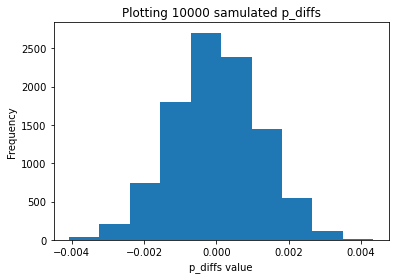

In [27]:
# plotting the normal distribution 
plt.hist(p_diffs);
plt.xlabel('p_diffs value')
plt.ylabel('Frequency')
plt.title('Plotting 10000 samulated p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
actual_diffs= df2.query('landing_page == "new_page"').converted.mean()- df2.query('landing_page== "old_page"').converted.mean()
actual_diffs

-0.0015782389853555567

In [29]:
p_diffs=np.array(p_diffs)
(p_diffs>actual_diffs).mean()

0.9049

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## The answer:
- In part j the value that has been computed is called 'p-value' in the scientific studies.
- p-value is a value that helps you decide whatever you should reject the null hypothesis or you should keep it.
- in part j we saw that our p-value=0.9
 - since p-value &ge; α (0.9 &ge; 0.5), therefore this is no evidence against the null hypothesis and hence, we fail to reject the null hypothesis.
- The above results suggest us keeping the old page because it looks more choosable for the users.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='smaller')
(z_score,p_value)

(-1.3109241984234394, 0.09494168724097551)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## The answer:
- The p-value is high and still the results fail to reject the null hypothesis.
- The results are still suggesting us to keep the old page.
- The results agree with parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 ## The answer:

 #### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept']= 1 # creating a new column
df2[['control','ab_page']]=pd.get_dummies(df2['group']) # creating two dummy varible columns 
df2.drop('control',axis=1, inplace=True) # droping unnecessary column

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
lm=sm.Logit(df2['converted'],df2[['intercept','ab_page']]) # calling logit function which will make the logistic regression model

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results=lm.fit()
results.summary() # displaying a summary of the model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        05:15:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

## The answer:
Before we talk about the p-value it is necessary to note that the hypotheses here is diffrent from Part II because here the test is a two sided test where in Part II it is a one sided test.
### Hypotheses in part III

$H_{0}$ : $p_{old}$ = $p_{new}$<br> 
$H_{1}$ : $p_{old}$ &ne; $p_{new}$



### Hypotheses in part II :

$H_{0}$ : $p_{old}$ &ge; $p_{new}$<br> 
$H_{1}$ : $p_{old}$ < $p_{new}$

So the p-value that we found in ab_page is 0.190 which is different from part II, because as we saw the null and alternative hypotheses in this part is different. In part II we  assumed that the old page is more preferable and we wanted to prove that the new page is better, and this is the reason why we got different p-value.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

## The answer:
- additional factors can influence individual converts, factors such as :
    - Gender.
    - Age.
    - Time spent on the website.


- disadvantages of using many factors:
    -  A linear relationship doesn't exist.
    -  Correlated errors.
    -  Non-constant variance.
    -  Outliers.
    -  Multicollinearity
    

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head() # displaying the new dataframe after the join operation.

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [37]:
df_new.country.unique() # finding how many unique country in the new data

array(['UK', 'US', 'CA'], dtype=object)

In [38]:
### Create the necessary dummy variables
df_new['intercept']= 1 # creating new column
df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])[['UK','US','CA']] # creating three dummy variables.

In [39]:
df_new.head()  # displaying the  dataframe after adding new columns

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


In [40]:
df_new.drop('CA',axis=1,inplace=True) # droping unnecessary column
df_new.head() # displaying the  dataframe after removing unnecessary column

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df_new['us_ab_page']=df_new['ab_page']*df_new['US'] # creating new column
df_new['uk_ab_page']=df_new['ab_page']*df_new['UK'] # creating new column


lm=sm.Logit(df_new['converted'],df_new[['intercept','us_ab_page','uk_ab_page','UK','US']]) # calling logit function which will make the logistic regression model
results=lm.fit()

results.summary() # displaying a summary of the model

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:               2.691e-05
Time:                        05:16:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
us_ab_page    -0.0206      0.014     -1.505      0.132      -0.047       0.006
uk_ab_page     0.0108      0.023      0.475      0.635      -0.034       0.056
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
US             0.0511      0.028      1.841      0.066      -0.003       0.105
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

- The results are insignificant in p-value, therefore, the country does not have any effect on the page and hence we fail to reject the null hypothesis 
- In all of the previous stages we could not find sufficient evidence that most of the users are converting from the old page to the new page and we failed to reject the null hypothesis as we saw before.
- After analysing the data in the previous three stages, we could not find a clear statistical significance that suggests us to change the landing page to the new one, so we should not lunch the new page and we should stick with the old one.
